In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import pandas_profiling as pp

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LinearRegression # linear model for classification
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn import linear_model

In [2]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
data['SALE PRICE']=pd.to_numeric(data['SALE PRICE'],errors='coerce')
data['LAND SQUARE FEET']=pd.to_numeric(data['LAND SQUARE FEET'],errors='coerce')
data['GROSS SQUARE FEET']=pd.to_numeric(data['GROSS SQUARE FEET'],errors='coerce')


In [13]:
newdata=data[data['SALE PRICE']>10000]
newdata1=newdata[data['GROSS SQUARE FEET']>100]
newdata2=newdata1[data['GROSS SQUARE FEET']<=7000]
newdata3=newdata2[data['LAND SQUARE FEET']>100]
newdata4=newdata3[data['LAND SQUARE FEET']<=7500]
newdata=newdata4[data['YEAR BUILT']>1900]

C:\Users\Nancy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Nancy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nancy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Nancy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Nancy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [15]:
newdata.shape

(25038, 22)

In [6]:
transformed_newdata = newdata.drop(['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT', 'EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS','APARTMENT NUMBER','SALE DATE','BUILDING CLASS AT TIME OF SALE'],axis=1)


In [7]:
scaler= StandardScaler()
scaler.fit(transformed_newdata)

transformed_data = scaler.transform(transformed_newdata)
transformed_data_df = pd.DataFrame(transformed_data, transformed_newdata)


In [8]:
# write list of features we want to use
X=['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE']
X=transformed_newdata[X]
y = transformed_newdata["SALE PRICE"]


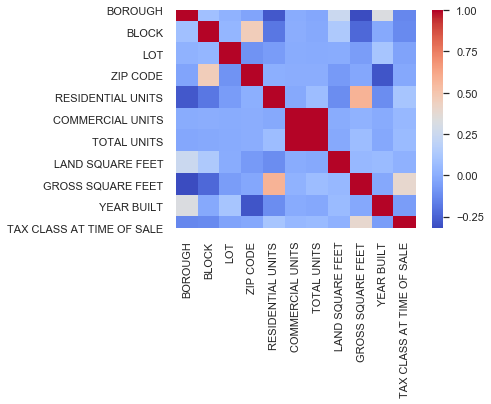

In [17]:
 sns.heatmap(X.corr(),square = True, cmap='coolwarm')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [19]:
# initialize model
linear_reg = LinearRegression()

# fit model
linear_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = linear_reg.score(X_test, y_test)
#COeffecient
coefficient= linear_reg.coef_
#GET INTERCEPTS
intercepts=linear_reg.intercept_
# predictions
y_pred = linear_reg.predict(X_test)

In [20]:
print(acc)

0.18922112454305862


In [12]:
# calculate the RMSE
rmse = sqrt(mean_squared_error(y_pred, y_test))

print(rmse)

1072535.8786164806
